In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np

<h1> Notes deciosion tree ! </h1>

In [2]:
df = pd.read_csv("../../../resources/data/500_Person_Gender_Height_Weight_Index.csv")  
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df['obese'] = (df.Index > 4).astype('int')
df.drop('Index',axis=1,inplace = True)

In [4]:
X = df.drop('Gender',axis=1)
X

,Height,Weight,obese
0,174,96,0
1,189,87,0
2,185,110,0
3,195,104,0
4,149,61,0
...,...,...,...
495,150,153,1
496,184,121,0
497,141,136,1
498,150,95,1


In [5]:
is_ob = df[df['obese']==0].drop('obese',axis=1)
ob = df[df['obese']==1].drop('obese',axis=1)

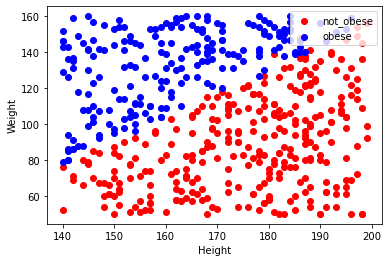

In [6]:
plt.scatter(is_ob['Height'],is_ob['Weight'],color='r',label='not_obese')
plt.scatter(ob['Height'],ob['Weight'],color='b',label='obese')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

In [46]:
len(is_ob)

302

In [47]:
len(ob)

198

Entropy

$$H(x) = - \sum_{k=0}^m p_k\log_2{p_k} $$
$k = 0,...,m$ target variable

In [7]:
df

,Gender,Height,Weight,obese
0,Male,174,96,0
1,Male,189,87,0
2,Female,185,110,0
3,Female,195,104,0
4,Male,149,61,0
...,...,...,...,...
495,Female,150,153,1
496,Female,184,121,0
497,Female,141,136,1
498,Male,150,95,1


In [8]:
def entropy(y):
    """
    
    """
    counter =  collections.Counter(y)
    p = np.array(list(counter.values()))/len(y)
    return -np.sum(p*np.log2(p))

In [39]:
weights = df['Weight'].unique()
data = np.array([0,0,0])
for i in range(1,len(weights)):
    weight = weights[i]
    a = df[df['Weight']<weight]
    b = df[df['Weight']>weight]
    e = entropy(a['obese'])
    e_1 = entropy(b['obese'])
    data = np.vstack([data,[weight,e,e_1]])

Text(0, 0.5, 'entropy')

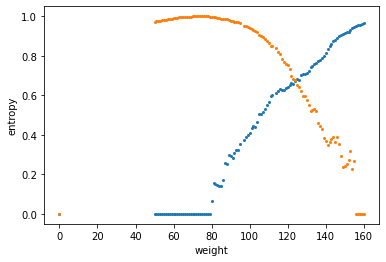

In [40]:
plt.scatter(data[:,0],data[:,1],s=4)
plt.scatter(data[:,0],data[:,2],s=4)
plt.xlabel('weight')
plt.ylabel('entropy')

from grafic we can see that entopy between 50 and 80 is lowest but how we can choose the number within interval ?
Information gain

Information Gain is calculated for a split by subtracting the weighted entropies of each branch from the original entropy. When training a Decision Tree using these metrics, the best split is chosen by maximizing Information Gain.

Information Gain is the expected
reduction in entropy caused by
partitioning the examples according to a
given attribute

$$IG(S,A) = E(S) - \sum \frac{|S_v|}{|S|}E(S_v) $$
* $E(S)$: The current entropy on our subset S, before any split <br>
* $|S|$: The size or the number of instances in S <br>
* $v$: Stands for value and represents each value of the attribute A <br>
* $S_v$: After splitting $S$ using $A$,  $S_v$ refers to each of the resulted subsets from S, that share the same value in A <br>
* $E(Sv)$: The entropy of a subset $Sv$ . This should be computed for each value of $A$ (assuming it is a discrete attribute)

In [42]:
def information_gain(y, mask, func=entropy):
    """
     y: target variable.
     mask: split choice.
     func: function to be used to calculate Information Gain in case os classification.
     
    """
    E = entropy(y)
    a = sum(mask)
    b = mask.shape[0] - a
    y_1 = y[mask]
    y_2 = y[-mask]
    print(len(y_1))
    return E - a/(a+b)*entropy(y_1) + b/(a+b)*entropy(y_2)

In [43]:
df[df['Weight']<2]
df['Weight']<2
x,y = df['Weight'], df['obese']
-(x < 80)    

0       True
1       True
2       True
3       True
4      False
       ...  
495     True
496     True
497     True
498     True
499     True
Name: Weight, Length: 500, dtype: bool

In [44]:
weights = df['Weight'].unique()
data = np.array([0,0])
for i in range(1,len(weights)):
    weight = weights[i]
    mask = df['Weight']<weight
    print()
    eg = information_gain(df['obese'],mask)
    print(weight,eg)
    data = np.vstack([data,[weight,eg]])


162
87 1.5530657514026251

270
110 1.065566543109393

234
104 1.2446873614353904

49
61 1.8608618583877212

182
92 1.4774515089838176

278
111 1.0228447952849964

174
90 1.5063455742018501

229
103 1.2707972316822373

133
81 1.659101990713671

124
80 1.7025368352308892

222
101 1.2986354157812743

9
51 1.92387665077228

118
79 1.73182220379702

253
107 1.1530991713590406

347
129 0.6590843581205221

422
145 0.28725981438983095

386
139 0.4480749142470485

442
149 0.1997993934880335

207
97 1.3727735572027253

74
67 1.8175121289799805

63
64 1.8370048411354136

193
95 1.4263679158239966

56
62 1.8490615316986765

490
159 0.027179291118834215

453
152 0.1565083486258321

315
121 0.8354180266592669

13
52 1.9178860695894975

66
65 1.8317563294697075

353
131 0.6259860818976116

457
153 0.1435542100103352

360
132 0.5881517514502557

286
114 0.9828312662977452

312
120 0.852128405548961

258
108 1.1274322908140646

28
56 1.894830836141898

304
118 0.8941320242408972

334
126 0.73214505162

Text(0, 0.5, 'information_gain')

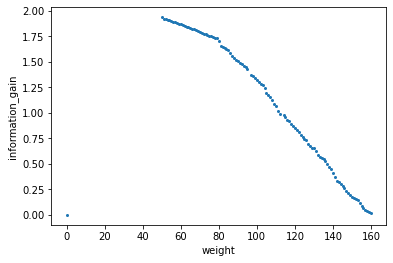

In [45]:
plt.scatter(data[:,0],data[:,1],s=4)
plt.xlabel('weight')
plt.ylabel('information_gain')